<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [30]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



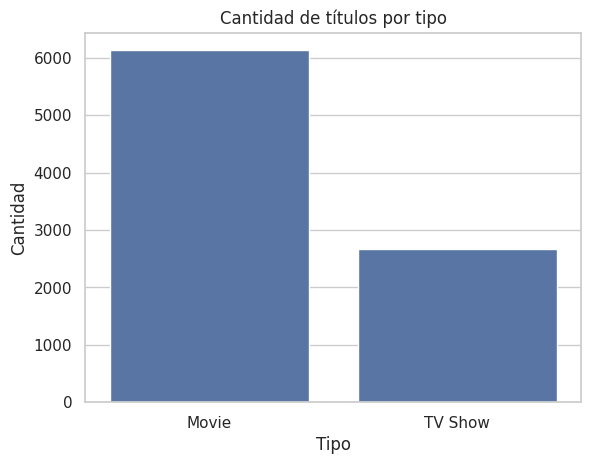

Conteo por tipo:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64
¿Cuál es el tipo de contenido predominante en Netflix?¿Qué implicancias podría tener para los usuarios?
Observando el grafico anterior podemos notar que el tipo de contenido predominante en netflix son las peliculas. El hecho de que Netflix tenga mas peliculas que series en su catalogo implica varias cosas, dentro de estas, tenemos el uso mas esporadico y casual de los usuarios, dado que el ver una pelicula en promedio puede tomarle a la genrte 2 horas y media, mientras que una serie de mayor duracion te puede tener pegado a la pantalla durante muchas mas horas


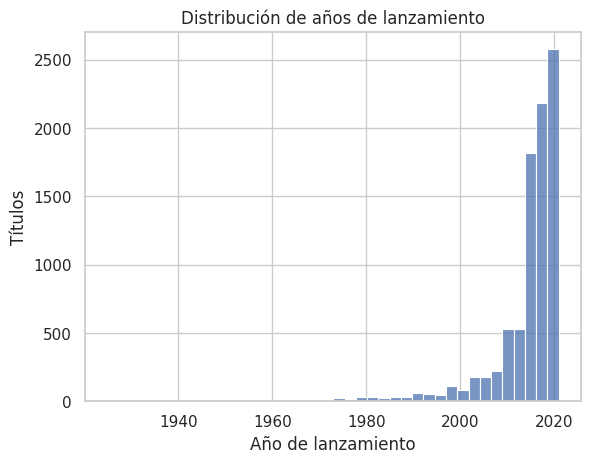

Rango de release_year: 1925 → 2021
¿Hay más contenido reciente o antiguo?¿Notas algún patrón en décadas específicas?
Viendo el histograma es claro que hay mas contenido reciente que antiguo. Sobre los patrones, podemos notar que la decada del 80 los titulos agregados son muy pocos, de hecho, observando el grafico se puede apreciar que los titulos agregados no superan los 100 , mientras que en esta ultima decada de 2010-20 ha incrementado considerablemente el numero de titulos agregados, superando la barrera de los 500 titulos en 2010, llegando a un peak de mas de 2500 titulos en 2020


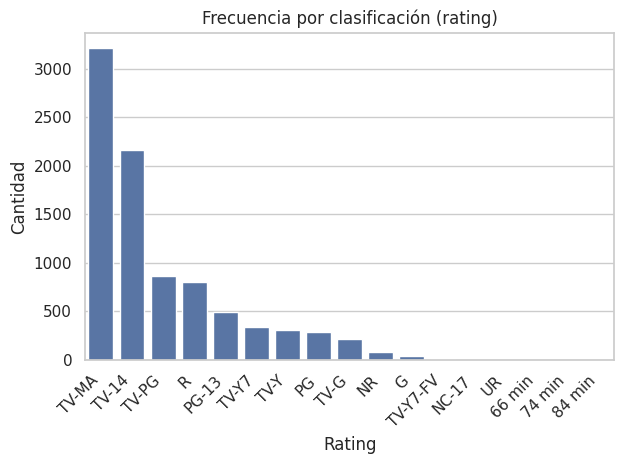

¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?
La clasificacion mas comun es TV-MA, el cual es un contenido para adulto. A partir de esto, yo creo que Netflix esta mas enfocado en un publico adulto, dado que la clasificacion mas comun es de la de TV-MA, la cual es contenido para adultos


In [31]:
grafico = (df['type']
      .value_counts()
      .rename_axis('type')
      .reset_index(name='count')
      .sort_values('count', ascending=False)
      .pipe(lambda t: sns.barplot(data=t, x='type', y='count')))
grafico.set_title('Cantidad de títulos por tipo')
grafico.set_xlabel('Tipo'); grafico.set_ylabel('Cantidad'); plt.show()

print('Conteo por tipo:\n', df['type'].value_counts())
print("¿Cuál es el tipo de contenido predominante en Netflix?¿Qué implicancias podría tener para los usuarios?")
print("Observando el grafico anterior podemos notar que el tipo de contenido predominante en netflix son las peliculas. El hecho de que Netflix tenga mas peliculas que series en su catalogo implica varias cosas, dentro de estas, tenemos el uso mas esporadico y casual de los usuarios, dado que el ver una pelicula en promedio puede tomarle a la genrte 2 horas y media, mientras que una serie de mayor duracion te puede tener pegado a la pantalla durante muchas mas horas")

#Ahora vamos con el histograma(2)

sns.histplot(data=df, x='release_year', bins=40, kde=False)
plt.title('Distribución de años de lanzamiento')
plt.xlabel('Año de lanzamiento'); plt.ylabel('Títulos'); plt.show()

print('Rango de release_year:', int(df['release_year'].min()), '→', int(df['release_year'].max()))
print("¿Hay más contenido reciente o antiguo?¿Notas algún patrón en décadas específicas?")
print("Viendo el histograma es claro que hay mas contenido reciente que antiguo. Sobre los patrones, podemos notar que la decada del 80 los titulos agregados son muy pocos, de hecho, observando el grafico se puede apreciar que los titulos agregados no superan los 100 , mientras que en esta ultima decada de 2010-20 ha incrementado considerablemente el numero de titulos agregados, superando la barrera de los 500 titulos en 2010, llegando a un peak de mas de 2500 titulos en 2020")

#Ahora vamos con el grafico que explicita la proporciones por rating

sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Frecuencia por clasificación (rating)'); plt.xlabel('Rating'); plt.ylabel('Cantidad')
plt.tight_layout(); plt.show()

print("¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?")
print("La clasificacion mas comun es TV-MA, el cual es un contenido para adulto. A partir de esto, yo creo que Netflix esta mas enfocado en un publico adulto, dado que la clasificacion mas comun es de la de TV-MA, la cual es contenido para adultos")





## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


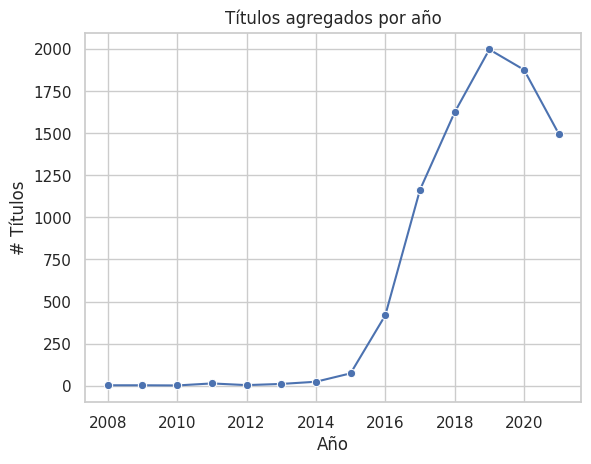

¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?
Observando el grafico, el catalogo de Netflix tuvo un mayor crecimiento entre 2016 y 2017. El hecho de que haya peresentado un crecimiento entre esos años va de la mano con que en esos años la plataforma se expandio de manera internacional, dando lugar a una mayor exposicion y multiculturalidad en los contenidos y titulos nuevos.


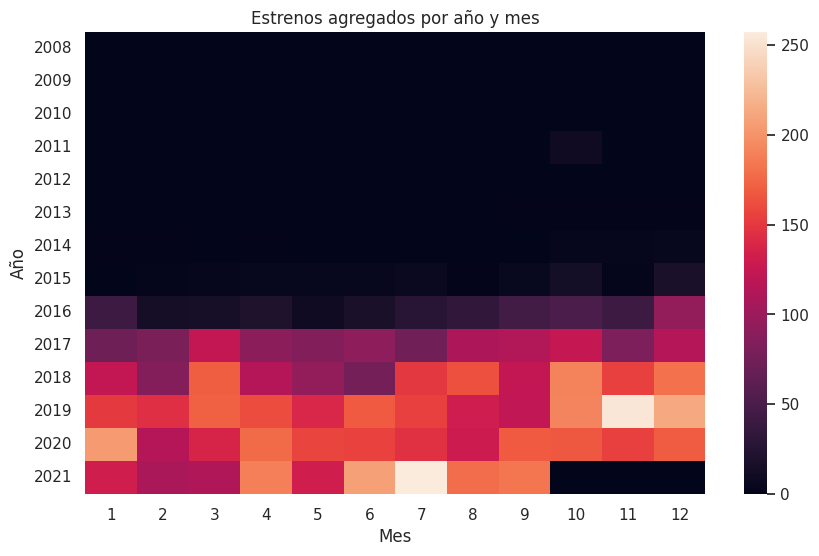

¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?
Observando el mapa de calor podemos notar que en los meses de marzo y julio se presentan mas estrenos que los demas meses, otros meses con una cantidad considerable de estrenos son junio y agosto. Entre los meses de junio y agosto hay gran cantidad de estrenos, lo cual coincide con la epoca invernal, que a su vez va ligado con el periodo regular de vacaciones de la gente, por lo que en Invierno por este factor antes mencionado, se tiene una mayor cantidad de estrenos en general.


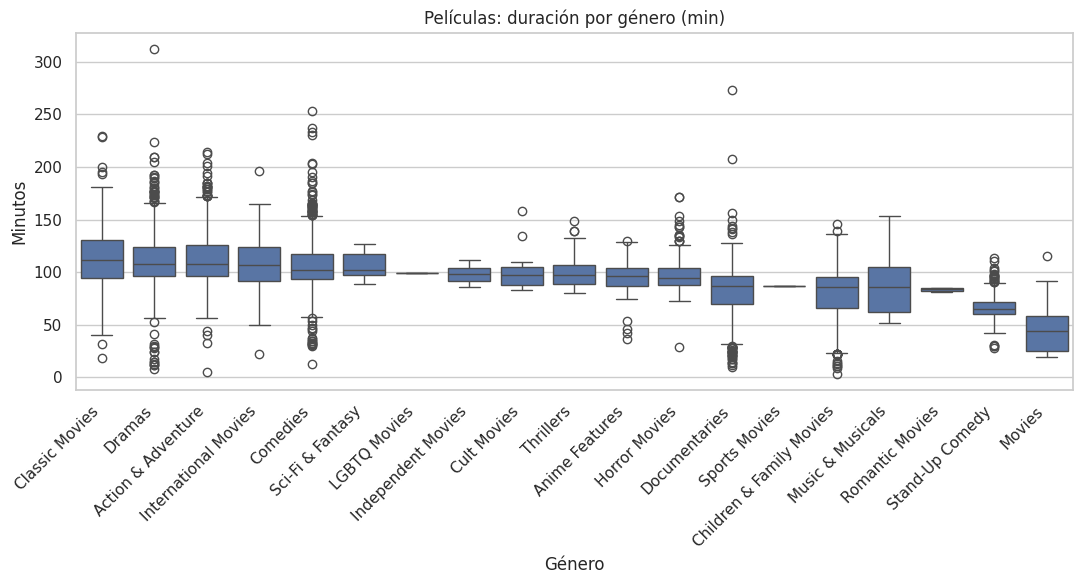

¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?
Observando el diagrama de caja se puede ver que los generos que suelen durar mas son: Classic Movies, Action & Adventure, International Movies y Dramas. La variabilidad en terminos generales depende del genero que observes, por ejemplo, la variabilida del genero Classic Movies es alta, mientras que en el genero Stand-Up Comedy la variabilidad es baja


In [45]:
#Serie temporal(4)
tmp = df.assign(date_added=pd.to_datetime(df['date_added'], errors='coerce'))
added_per_year = (tmp.dropna(subset=['date_added'])
                    .assign(year_added=lambda t: t['date_added'].dt.year)
                    .groupby('year_added')
                    .size()
                    .reset_index(name='n_titles'))

sns.lineplot(data=added_per_year, x='year_added', y='n_titles', marker='o')
plt.title('Títulos agregados por año'); plt.xlabel('Año'); plt.ylabel('# Títulos')
plt.show()

print("¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?")
print("Observando el grafico, el catalogo de Netflix tuvo un mayor crecimiento entre 2016 y 2017. El hecho de que haya peresentado un crecimiento entre esos años va de la mano con que en esos años la plataforma se expandio de manera internacional, dando lugar a una mayor exposicion y multiculturalidad en los contenidos y titulos nuevos.")

#Ahora vamos con el mapa de calor

tmp = df.assign(date_added=pd.to_datetime(df['date_added'], errors='coerce')).dropna(subset=['date_added'])
tmp = tmp.assign(year_added=tmp['date_added'].dt.year,
                 month_added=tmp['date_added'].dt.month)

tabla = (tmp.groupby(['year_added','month_added'])
           .size().reset_index(name='n'))
pv = tabla.pivot(index='year_added', columns='month_added', values='n').fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(pv)
plt.title('Estrenos agregados por año y mes')
plt.xlabel('Mes'); plt.ylabel('Año')
plt.show()

print("¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?")
print("Observando el mapa de calor podemos notar que en los meses de marzo y julio se presentan mas estrenos que los demas meses, otros meses con una cantidad considerable de estrenos son junio y agosto. Entre los meses de junio y agosto hay gran cantidad de estrenos, lo cual coincide con la epoca invernal, que a su vez va ligado con el periodo regular de vacaciones de la gente, por lo que en Invierno por este factor antes mencionado, se tiene una mayor cantidad de estrenos en general.")

#Extraer duracion de peliculas por genero y crear boxplot

pelis = df.loc[df['type']=='Movie'].copy()

pelis['duration_min'] = pd.to_numeric(
    pelis['duration'].astype('string').str.lower().str.extract(r'(\d+)\s*min')[0],
    errors='coerce'
)

pelis['main_genre'] = (pelis['listed_in'].astype('string').str.split(',')
                       .str[0].str.strip())

pelis = pelis.dropna(subset=['duration_min', 'main_genre'])
orden = (pelis.groupby('main_genre')['duration_min']
              .median().sort_values(ascending=False).index)

plt.figure(figsize=(11,6))
sns.boxplot(data=pelis, x='main_genre', y='duration_min', order=orden)
plt.xticks(rotation=45, ha='right')
plt.title('Películas: duración por género (min)'); plt.xlabel('Género'); plt.ylabel('Minutos')
plt.tight_layout(); plt.show()

print("¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?")
print("Observando el diagrama de caja se puede ver que los generos que suelen durar mas son: Classic Movies, Action & Adventure, International Movies y Dramas. La variabilidad en terminos generales depende del genero que observes, por ejemplo, la variabilida del genero Classic Movies es alta, mientras que en el genero Stand-Up Comedy la variabilidad es baja")



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



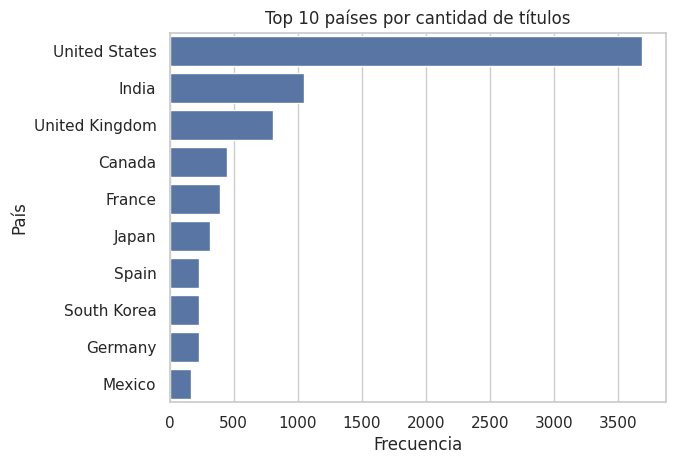

¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?
Los paises que dominan el catalogo son Estados Unidos, India y Reino Unido. Encuentro yo que la distribucion es esperada, dado que los paises que lideran dicha grafica poseen una mayor cantidad de poblacion y volumen industrial 


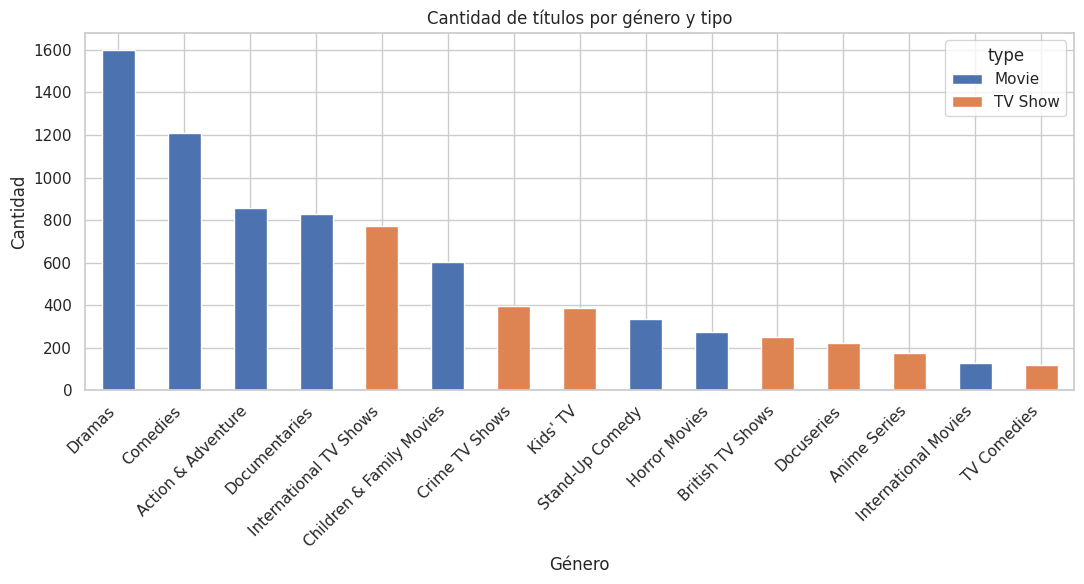

¿Existen géneros más asociados a películas o a series?
Si, viendo el grafico pódemos observar por ejemplo que en el genero de comedia esta mas asociado a peliculas que a series, mientras que en el genero de peliculas y series internacionales, dicho genero esta mas asociado a series que a peliculas


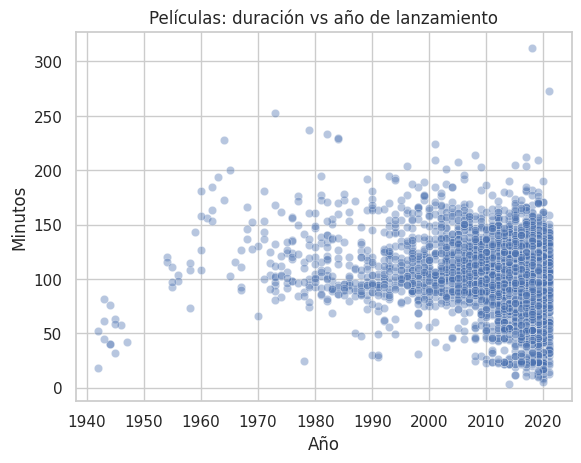

¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?
En general viendo el grafico de dispersion no se observa un cambio significativo en los estandares de la duracion de las peliculas durante el tiempo. Si se observan outliners interesantes, como por ejemplo la pelicula que se encuentre al final de la decada del 2010, la cual es unica con respecto al resto dado que tiene una duracion mayor a 300 minutos, muy por encima de la duracion de las demas peliculas en general.


In [62]:
#Paises mas frecuentes enla columna country (7)
countries = (df.dropna(subset=['country'])
               .assign(country=df['country'].astype('string').str.split(','))
               .explode('country'))
countries['country'] = countries['country'].str.strip()
top_ctry = countries['country'].value_counts().head(10)
sns.barplot(y=top_ctry.index, x=top_ctry.values)
plt.title('Top 10 países por cantidad de títulos')
plt.xlabel('Frecuencia'); plt.ylabel('País')
plt.show()

print("¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?")
print("Los paises que dominan el catalogo son Estados Unidos, India y Reino Unido. Encuentro yo que la distribucion es esperada, dado que los paises que lideran dicha grafica poseen una mayor cantidad de poblacion y volumen industrial ")

#Grafico de barras apiladas

tmp = df.copy()
tmp['main_genre'] = tmp['listed_in'].astype('string').str.split(',').str[0].str.strip()

tabla = (tmp.pivot_table(index='main_genre', columns='type', values='show_id',
                         aggfunc='count', fill_value=0))
tabla = tabla.assign(total=tabla.sum(axis=1)) \
             .sort_values('total', ascending=False) \
             .head(15) \
             .drop(columns='total')
tabla.plot(kind='bar', stacked=True, figsize=(11,6))
plt.title('Cantidad de títulos por género y tipo')
plt.xlabel('Género'); plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); plt.show()

print("¿Existen géneros más asociados a películas o a series?")
print("Si, viendo el grafico pódemos observar por ejemplo que en el genero de comedia esta mas asociado a peliculas que a series, mientras que en el genero de peliculas y series internacionales, dicho genero esta mas asociado a series que a peliculas")

#Ahora vamos con el grafico de dispersion (9)

pelis = df.loc[df['type']=='Movie'].copy()
pelis['duration_min'] = pd.to_numeric(
    pelis['duration'].astype('string').str.lower().str.extract(r'(\d+)\s*min')[0],
    errors='coerce'
)
pelis = pelis.dropna(subset=['duration_min', 'release_year'])
sns.scatterplot(data=pelis, x='release_year', y='duration_min', alpha=0.4)
plt.title('Películas: duración vs año de lanzamiento')
plt.xlabel('Año'); plt.ylabel('Minutos')
plt.show()

print("¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?")
print("En general viendo el grafico de dispersion no se observa un cambio significativo en los estandares de la duracion de las peliculas durante el tiempo. Si se observan outliners interesantes, como por ejemplo la pelicula que se encuentre al final de la decada del 2010, la cual es unica con respecto al resto dado que tiene una duracion mayor a 300 minutos, muy por encima de la duracion de las demas peliculas en general.")





## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME

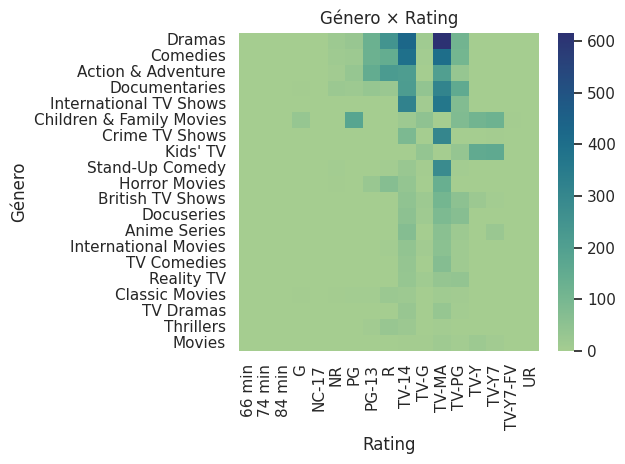

¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?
Los generos que estan mas dirigidos a un publico adulto son: listed_in
Dramas                    865
Comedies                  547
Action & Adventure        421
International TV Shows    369
Documentaries             341
dtype: int64
Por otro lado, los generos que estan mas dirigidos a un publico infantil o familiar son: listed_in
Children & Family Movies    531
Kids' TV                    348
Documentaries               177
Dramas                      145
Comedies                    124
dtype: int64


In [69]:
#HeatMap con las combinaciones mas frecuentes de género + rating
g = df['listed_in'].astype('string').str.split(',').str[0].str.strip()
r = df['rating'].astype('string').str.strip()
M = pd.crosstab(g, r)
top = M.sum(1).sort_values(ascending=False).head(20).index
sns.heatmap(M.loc[top], cmap='crest')
plt.title('Género × Rating'); plt.xlabel('Rating'); plt.ylabel('Género'); plt.tight_layout(); plt.show()
adult_cols  = [c for c in ['TV-MA','R','NC-17'] if c in M.columns]
family_cols = [c for c in ['TV-Y','TV-Y7','G','PG','TV-PG'] if c in M.columns]

print("¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?")
print("Los generos que estan mas dirigidos a un publico adulto son:", M[adult_cols].sum(1).sort_values(ascending=False).head(5))
print("Por otro lado, los generos que estan mas dirigidos a un publico infantil o familiar son:", M[family_cols].sum(1).sort_values(ascending=False).head(5))


